# 	Clustering dan Analisis Kualitas Cluster
## Inisialisasi Library, Input dan Membaca data yang dibutuhkan


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from google.colab import drive

In [ ]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/IoT/Crop_recommendationV2.csv")

In [ ]:
df

,N,P,K,temperature,humidity,ph,rainfall,label,soil_moisture,soil_type,...,organic_matter,irrigation_frequency,crop_density,pest_pressure,fertilizer_usage,growth_stage,urban_area_proximity,water_source_type,frost_risk,water_usage_efficiency
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,29.446064,2,...,3.121395,4,11.743910,57.607308,188.194958,1,2.719614,3,95.649985,1.193293
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,12.851183,3,...,2.142021,4,16.797101,74.736879,70.963629,1,4.714427,2,77.265694,1.752672
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,29.363913,2,...,1.474974,1,12.654395,1.034478,191.976077,1,30.431736,2,18.192168,3.035541
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,26.207732,3,...,8.393907,1,10.864360,24.091888,55.761388,3,10.861071,3,82.818720,1.273341
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,28.236236,2,...,5.202285,3,13.852910,38.811481,185.259702,2,47.190777,3,25.466499,2.578671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,10.697757,1,...,4.720355,5,18.597260,87.431199,185.833381,3,31.415618,1,77.719639,4.111619
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,12.203830,3,...,4.141148,6,15.417979,36.958354,198.541021,2,18.797510,3,22.336839,4.190796
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,28.989176,3,...,1.599614,5,12.956675,79.678658,86.724381,2,38.805888,3,41.782729,2.447010
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,13.642305,2,...,8.934077,6,16.868131,31.007156,72.191421,2,8.395498,3,49.619791,4.119388


In [ ]:
df['fertilizer_usage'] = df['N'] + df['P'] + df['K']
df.drop(columns=['N', 'P', 'K'], inplace=True)

In [ ]:
df.shape[0]

2200

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df.describe()

,temperature,humidity,ph,rainfall,soil_moisture,soil_type,sunlight_exposure,wind_speed,co2_concentration,organic_matter,irrigation_frequency,crop_density,pest_pressure,fertilizer_usage,growth_stage,urban_area_proximity,water_source_type,frost_risk,water_usage_efficiency
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,25.616244,71.481779,6.469480,103.463655,20.151388,1.991364,8.570609,10.170939,399.647514,5.465652,3.515000,12.344959,49.850701,152.063636,1.999545,24.801013,2.003636,50.304701,2.990268
std,5.063749,22.263812,0.773938,54.958389,5.793720,0.812263,1.999382,5.739038,28.447148,2.605294,1.697912,4.297494,28.886354,79.918669,0.818999,14.523975,0.812021,28.580352,1.139637
min,8.825675,14.258040,3.504752,20.211267,10.024260,1.000000,5.000710,0.002870,350.001385,1.003338,1.000000,5.004341,0.038103,17.000000,1.000000,0.017756,1.000000,0.054911,1.002106
25%,22.769375,60.261953,5.971693,64.551686,15.179949,1.000000,6.904620,5.282754,375.250302,3.203903,2.000000,8.585734,24.379866,94.000000,1.000000,12.212594,1.000000,26.104674,2.051814
50%,25.598693,80.473146,6.425045,94.867624,20.088481,2.000000,8.609968,10.256241,399.691470,5.418049,4.000000,12.303616,49.982421,146.000000,2.000000,24.922548,2.000000,50.171934,2.968675
75%,28.561654,89.948771,6.923643,124.267508,25.255146,3.000000,10.220394,15.057313,424.121617,7.686417,5.000000,15.975567,74.681904,179.000000,3.000000,37.322761,3.000000,75.262676,3.968736
max,43.675493,99.981876,9.935091,298.560117,29.997860,3.000000,11.991041,19.991294,449.984390,9.999990,6.000000,19.988474,99.983849,385.000000,3.000000,49.992046,3.000000,99.957274,4.997130


In [ ]:
columns_to_drop = ['soil_moisture','rainfall', 'label','soil_type','sunlight_exposure','wind_speed','co2_concentration','organic_matter','crop_density','pest_pressure','growth_stage','water_usage_efficiency','frost_risk','water_source_type','ph','irrigation_frequency','urban_area_proximity']
df.drop(columns=columns_to_drop, inplace=True) # Changed existing_columns to columns_to_drop
display(df)

,temperature,humidity,fertilizer_usage
0,20.879744,82.002744,175
1,21.770462,80.319644,184
2,23.004459,82.320763,159
3,26.491096,80.158363,149
4,20.130175,81.604873,162
...,...,...,...
2195,26.774637,66.413269,173
2196,27.417112,56.636362,141
2197,24.131797,67.225123,181
2198,26.272418,52.127394,183


## Data Cleaning

In [ ]:
#mengubah nama kolom
df.columns = ['suhu','kelembaban','penggunaan_pupuk']
display(df)

,suhu,kelembaban,penggunaan_pupuk
0,20.879744,82.002744,175
1,21.770462,80.319644,184
2,23.004459,82.320763,159
3,26.491096,80.158363,149
4,20.130175,81.604873,162
...,...,...,...
2195,26.774637,66.413269,173
2196,27.417112,56.636362,141
2197,24.131797,67.225123,181
2198,26.272418,52.127394,183


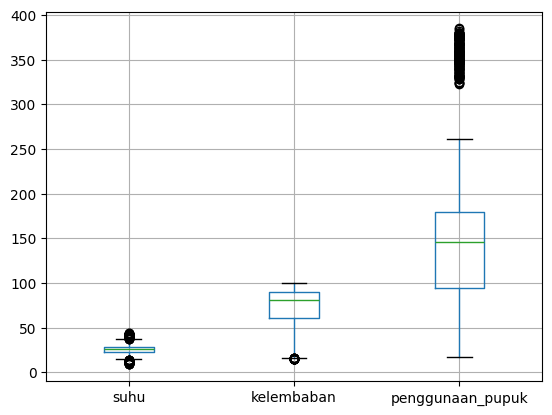

In [ ]:
#memeriksa outlier
df.boxplot()
plt.show()

In [ ]:
#memeriksa missing value
df.isna().sum()

,0
suhu,0
kelembaban,0
penggunaan_pupuk,0


In [ ]:
#menghilangkan objek outlier
df = df.drop(df[(df['suhu'] > 35 ) | (df['suhu'] < 25)].index)
display(df)
df.describe()

,suhu,kelembaban,penggunaan_pupuk
3,26.491096,80.158363,149
10,26.527235,81.417538,184
12,26.800796,80.886848,180
14,25.665852,80.663850,181
21,25.157455,83.117135,159
...,...,...,...
2191,27.548230,62.881792,183
2192,25.627355,57.041511,162
2195,26.774637,66.413269,173
2196,27.417112,56.636362,141


,suhu,kelembaban,penggunaan_pupuk
count,1152.000000,1152.000000,1152.000000
mean,28.270266,74.869324,135.418403
std,2.355629,16.494889,61.733447
min,25.001719,30.400468,20.000000
25%,26.338178,61.887336,88.000000
50%,27.932985,80.531775,131.000000
75%,29.528242,89.904220,167.250000
max,34.946616,99.981876,380.000000


Imputation - Smart way to handle missing value

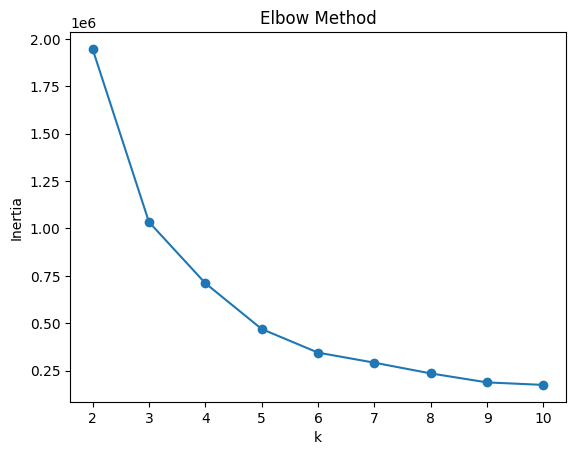

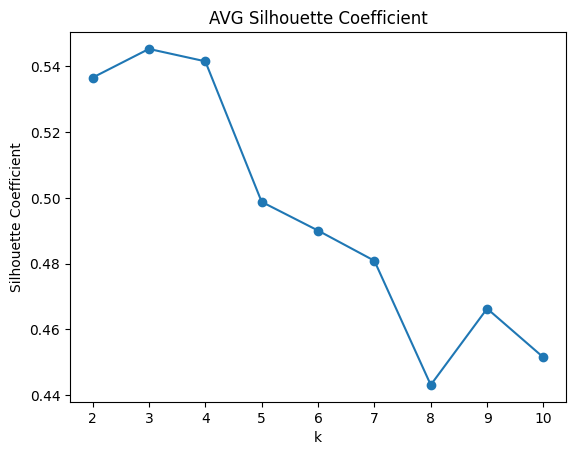

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

#mencoba beragam nilai k dari 2 hingga 10
inertia = []
silhouette_coefficients = []
K = range(2,11)
for k in K:
    kmeans_model = KMeans(n_clusters=k, random_state=0).fit(df.values)
    inertia.append(kmeans_model.inertia_)
    score = silhouette_score(df.values, kmeans_model.labels_,  metric='euclidean')
    silhouette_coefficients.append(score)

#visualisasi hasil elbow method
plt.plot(K, inertia, marker= "o")
plt.xlabel('k')
plt.xticks(np.arange(2, 11))
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

#visualisasi hasil perhitungan koefisien Silhouette
plt.plot(K, silhouette_coefficients, marker= "o")
plt.xlabel('k')
plt.xticks(np.arange(2, 11))
plt.ylabel("Silhouette Coefficient")
plt.title("AVG Silhouette Coefficient")
plt.show()

In [ ]:
inertia

[1946496.5846622598,
 1033476.8180360664,
 710565.4522635207,
 468754.0291023905,
 344271.66191864864,
 291219.7872336584,
 235218.5681337769,
 187281.28825618525,
 176169.5269006875]

In [ ]:
silhouette_coefficients

[0.5367006938893818,
 0.5454766470006897,
 0.5417154860759144,
 0.49903584618932684,
 0.49026291247580467,
 0.48113040427066495,
 0.4390489577560362,
 0.4648344928072997,
 0.4371500288699394]

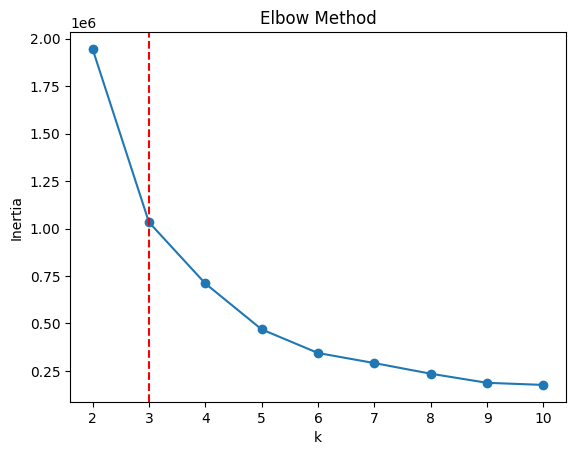

In [ ]:
# The elbow point is the point where the decrease in inertia starts to level off.
# In this case, the elbow point appears to be at k = 3.

plt.plot(K, inertia, marker= "o")
plt.xlabel('k')
plt.xticks(np.arange(2, 11))
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.axvline(x=3, color='r', linestyle='--')
plt.show()

In [ ]:
silhouette_coefficients

[0.5367006938893818,
 0.5454766470006897,
 0.5417154860759144,
 0.49903584618932684,
 0.49026291247580467,
 0.48113040427066495,
 0.4390489577560362,
 0.4648344928072997,
 0.4371500288699394]

# Visualisasi Data

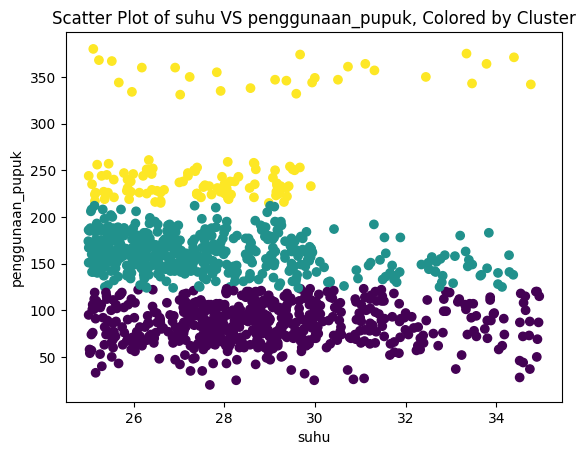

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

#inisialisasi model KMeans dengan 3 cluster
model = KMeans(n_clusters=3, random_state=0)
model.fit(df[['suhu', 'penggunaan_pupuk']])

#menambahkan label cluster pada data
df['cluster'] = model.labels_

#visualisasi data cluster
plt.scatter(df['suhu'], df['penggunaan_pupuk'], c=df['cluster'], cmap='viridis')
plt.xlabel('suhu')
plt.ylabel('penggunaan_pupuk')
plt.title('Scatter Plot of suhu VS penggunaan_pupuk, Colored by Cluster')
plt.show()

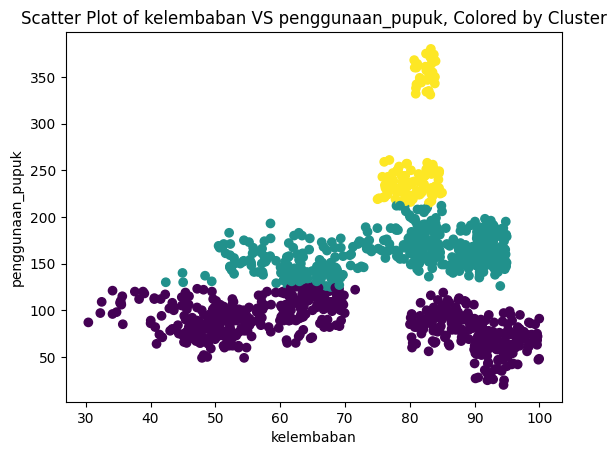

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

#inisialisasi model KMeans dengan 3 cluster
model = KMeans(n_clusters=3, random_state=0)
model.fit(df[['kelembaban', 'penggunaan_pupuk']])

#menambahkan label cluster pada data
df['cluster'] = model.labels_

#visualisasi data cluster
plt.scatter(df['kelembaban'], df['penggunaan_pupuk'], c=df['cluster'], cmap='viridis')
plt.xlabel('kelembaban')
plt.ylabel('penggunaan_pupuk')
plt.title('Scatter Plot of kelembaban VS penggunaan_pupuk, Colored by Cluster')
plt.show()

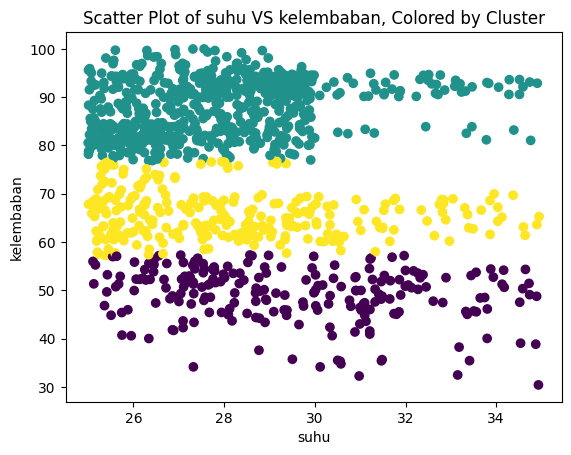

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

#inisialisasi model KMeans dengan 3 cluster
model = KMeans(n_clusters=3, random_state=0)
model.fit(df[['suhu', 'kelembaban']])

#menambahkan label cluster pada data
df['cluster'] = model.labels_

#visualisasi data cluster
plt.scatter(df['suhu'], df['kelembaban'], c=df['cluster'], cmap='viridis')
plt.xlabel('suhu')
plt.ylabel('kelembaban')
plt.title('Scatter Plot of suhu VS kelembaban, Colored by Cluster')
plt.show()

In [ ]:
# Print hasil klasterisasi
print("suhu")
print(df.groupby('cluster')['suhu'].describe())
print("=============")
print("kelembaban")
print(df.groupby('cluster')['kelembaban'].describe())
print("=============")
print("penggunaan_pupuk")
print(df.groupby('cluster')['penggunaan_pupuk'].describe())
print("=============")

suhu
         count       mean       std        min        25%        50%  \
cluster                                                                
0        225.0  29.515162  2.574501  25.107874  27.335349  29.263829   
1        652.0  27.867875  2.047053  25.001719  26.214445  27.712663   
2        275.0  28.205748  2.504610  25.009334  26.131002  27.742748   

               75%        max  
cluster                        
0        31.329956  34.931742  
1        29.105447  34.906653  
2        29.601010  34.946616  
kelembaban
         count       mean       std        min        25%        50%  \
cluster                                                                
0        225.0  49.060199  5.633815  30.400468  45.932484  50.098318   
1        652.0  87.622766  5.701420  76.853201  82.574620  87.870394   
2        275.0  65.748630  4.716400  57.210256  62.203478  65.148775   

               75%        max  
cluster                        
0        53.059805  57.306360  
1     

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

for cluster in range(3):
  cluster_data = df[df['cluster'] == cluster]
  actual_values = cluster_data['suhu']
  predicted_values = np.full(len(actual_values), actual_values.mean())

  mse = mean_squared_error(actual_values, predicted_values)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(actual_values, predicted_values)
  r2 = r2_score(actual_values, predicted_values)

  print(f"Cluster {cluster}:")
  print(f"MSE: {mse}")
  print(f"RMSE: {rmse}")
  print(f"MAE: {mae}")
  print(f"R^2: {r2}")
  print("-" * 20)

Cluster 0:
MSE: 6.59859670783668
RMSE: 2.5687733858471593
MAE: 2.209107125071802
R^2: 0.0
--------------------
Cluster 1:
MSE: 4.183998010029818
RMSE: 2.045482341656808
MAE: 1.6171961721452637
R^2: 0.0
--------------------
Cluster 2:
MSE: 6.250259797463961
RMSE: 2.5000519589528456
MAE: 2.0321879665695213
R^2: 0.0
--------------------


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

for cluster in range(3):
  cluster_data = df[df['cluster'] == cluster]
  actual_values = cluster_data['kelembaban']
  predicted_values = np.full(len(actual_values), actual_values.mean())

  mse = mean_squared_error(actual_values, predicted_values)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(actual_values, predicted_values)
  r2 = r2_score(actual_values, predicted_values)

  print(f"Cluster {cluster}:")
  print(f"MSE: {mse}")
  print(f"RMSE: {rmse}")
  print(f"MAE: {mae}")
  print(f"R^2: {r2}")
  print("-" * 20)

Cluster 0:
MSE: 31.598806926288937
RMSE: 5.6212816088761235
MAE: 4.397853481000691
R^2: 0.0
--------------------
Cluster 1:
MSE: 32.45633841096812
RMSE: 5.697046463823876
MAE: 5.050684367413291
R^2: 0.0
--------------------
Cluster 2:
MSE: 22.163543443679217
RMSE: 4.707817269571878
MAE: 3.816151652949157
R^2: 0.0
--------------------


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

for cluster in range(3):
  cluster_data = df[df['cluster'] == cluster]
  actual_values = cluster_data['penggunaan_pupuk']
  predicted_values = np.full(len(actual_values), actual_values.mean())

  mse = mean_squared_error(actual_values, predicted_values)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(actual_values, predicted_values)
  r2 = r2_score(actual_values, predicted_values)

  print(f"Cluster {cluster}:")
  print(f"MSE: {mse}")
  print(f"RMSE: {rmse}")
  print(f"MAE: {mae}")
  print(f"R^2: {r2}")
  print("-" * 20)

Cluster 0:
MSE: 842.5336098765432
RMSE: 29.02642950616805
MAE: 22.54577777777778
R^2: 0.0
--------------------
Cluster 1:
MSE: 5214.017320467462
RMSE: 72.20815272853518
MAE: 56.11160563062215
R^2: 0.0
--------------------
Cluster 2:
MSE: 1254.5024264462813
RMSE: 35.41895575036454
MAE: 27.05261487603306
R^2: 0.0
--------------------


In [ ]:
df

,suhu,kelembaban,penggunaan_pupuk,cluster
3,26.491096,80.158363,149,1
10,26.527235,81.417538,184,1
12,26.800796,80.886848,180,1
14,25.665852,80.663850,181,1
21,25.157455,83.117135,159,1
...,...,...,...,...
2191,27.548230,62.881792,183,2
2192,25.627355,57.041511,162,0
2195,26.774637,66.413269,173,2
2196,27.417112,56.636362,141,0


In [ ]:
#convert menjadi excel
df.to_excel('output.xlsx', index=False)

In [ ]:
#download excel nya
from google.colab import files
files.download('output.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Klasifikasi menggunakan algoritma K-Nearest Neighbours

In [ ]:
#libraries
import pandas as pd
from google.colab import drive
import numpy as np
from sklearn import preprocessing

In [ ]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/IoT/output.xlsx")

In [ ]:
prediktor = df[['suhu', 'kelembaban', 'penggunaan_pupuk']]
array_prediktor = np.array(prediktor.values)

In [ ]:
cluster_label = df[['cluster']]
# Buat array NumPy dari label cluster
cluster_array = np.array(cluster_label.values) # numpy array
# Sekarang 'cluster_array' berisi label cluster untuk setiap baris data dalam 'prediktor'
cluster_array

array([[1],
       [1],
       [1],
       ...,
       [2],
       [0],
       [0]])

In [ ]:
cluster_counts = df['cluster'].value_counts()
cluster_counts

,count
cluster,
1,652
2,275
0,225


In [ ]:
#buat x dan y nya
x = prediktor
y = cluster_array

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
fs = SelectKBest(score_func=f_classif, k='all')
# learn relationship from training data
fs.fit(x, y)

for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))


# Select features
# Pilih atribut prediktor dgn highest scores)
# petal_length, petal_width
features = fs.transform(x)

Feature 0: 44.109616
Feature 1: 4660.686127
Feature 2: 66.062183


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
x = features[:]
y = cluster_array

# MEMBUAT MODEL KLASIFIKASI
## Inisialisasi Library, Input dan Membaca data yang dibutuhkan


In [ ]:
#libraries
import pandas as pd
from google.colab import drive

import matplotlib.pyplot as plt

In [ ]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/IoT/Crop_recommendationV2.csv")

In [ ]:
df

,N,P,K,temperature,humidity,ph,rainfall,soil_moisture,soil_type,sunlight_exposure,...,organic_matter,irrigation_frequency,crop_density,pest_pressure,fertilizer_usage,growth_stage,urban_area_proximity,water_source_type,frost_risk,water_usage_efficiency
0,90,42,43,20.879744,82.002744,6.502985,202.935536,29.446064,2,8.677355,...,3.121395,4,11.743910,57.607308,188.194958,1,2.719614,3,95.649985,1.193293
1,85,58,41,21.770462,80.319644,7.038096,226.655537,12.851183,3,5.754288,...,2.142021,4,16.797101,74.736879,70.963629,1,4.714427,2,77.265694,1.752672
2,60,55,44,23.004459,82.320763,7.840207,263.964248,29.363913,2,9.875230,...,1.474974,1,12.654395,1.034478,191.976077,1,30.431736,2,18.192168,3.035541
3,74,35,40,26.491096,80.158363,6.980401,242.864034,26.207732,3,8.023685,...,8.393907,1,10.864360,24.091888,55.761388,3,10.861071,3,82.818720,1.273341
4,78,42,42,20.130175,81.604873,7.628473,262.717340,28.236236,2,8.120512,...,5.202285,3,13.852910,38.811481,185.259702,2,47.190777,3,25.466499,2.578671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,10.697757,1,10.330875,...,4.720355,5,18.597260,87.431199,185.833381,3,31.415618,1,77.719639,4.111619
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,12.203830,3,6.070558,...,4.141148,6,15.417979,36.958354,198.541021,2,18.797510,3,22.336839,4.190796
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,28.989176,3,11.097182,...,1.599614,5,12.956675,79.678658,86.724381,2,38.805888,3,41.782729,2.447010
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,13.642305,2,8.097337,...,8.934077,6,16.868131,31.007156,72.191421,2,8.395498,3,49.619791,4.119388


In [ ]:
df['fertilizer_usage'] = df['N'] + df['P'] + df['K']
df.drop(columns=['N', 'P', 'K'], inplace=True)

## Visualisasi Data & Features Engineer

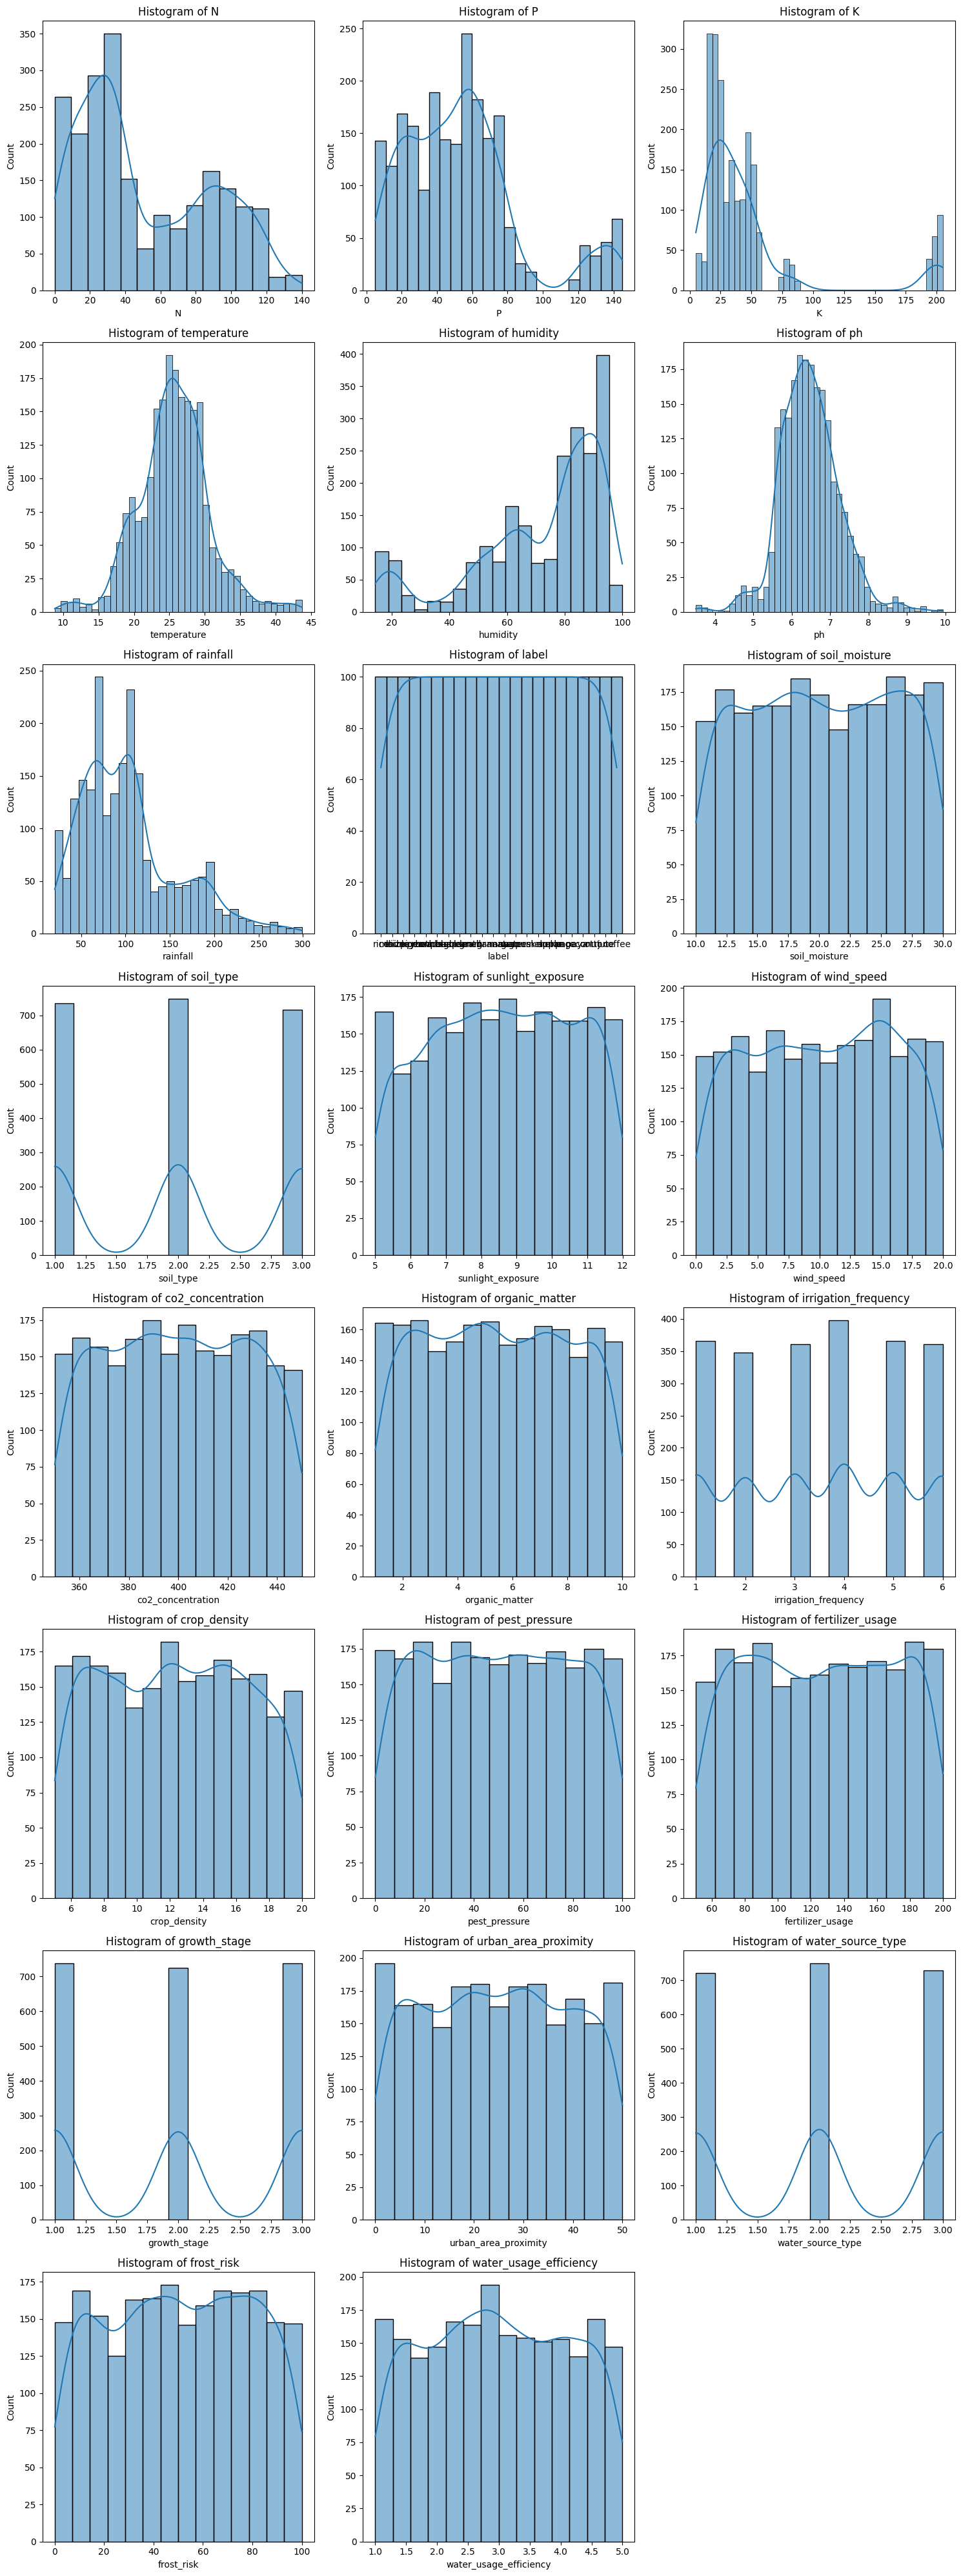

In [ ]:
# prompt: tampilkan histogram keseluruhan atribut dalam satu gambar
import seaborn as sns # Import seaborn library

# Calculate the number of rows and columns needed for subplots
num_cols = len(df.columns)
num_rows = (num_cols + 2) // 3  # Calculate rows, ensuring at least 2 columns per row

# Create a figure and axes for the subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through the columns and create histograms
for i, column in enumerate(df.columns):
    sns.histplot(df[column], ax=axes[i], kde=True)  # Add KDE for better visualization
    axes[i].set_title(f'Histogram of {column}')

# Remove any unused subplots if the number of columns is not a multiple of 3
for i in range(num_cols, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

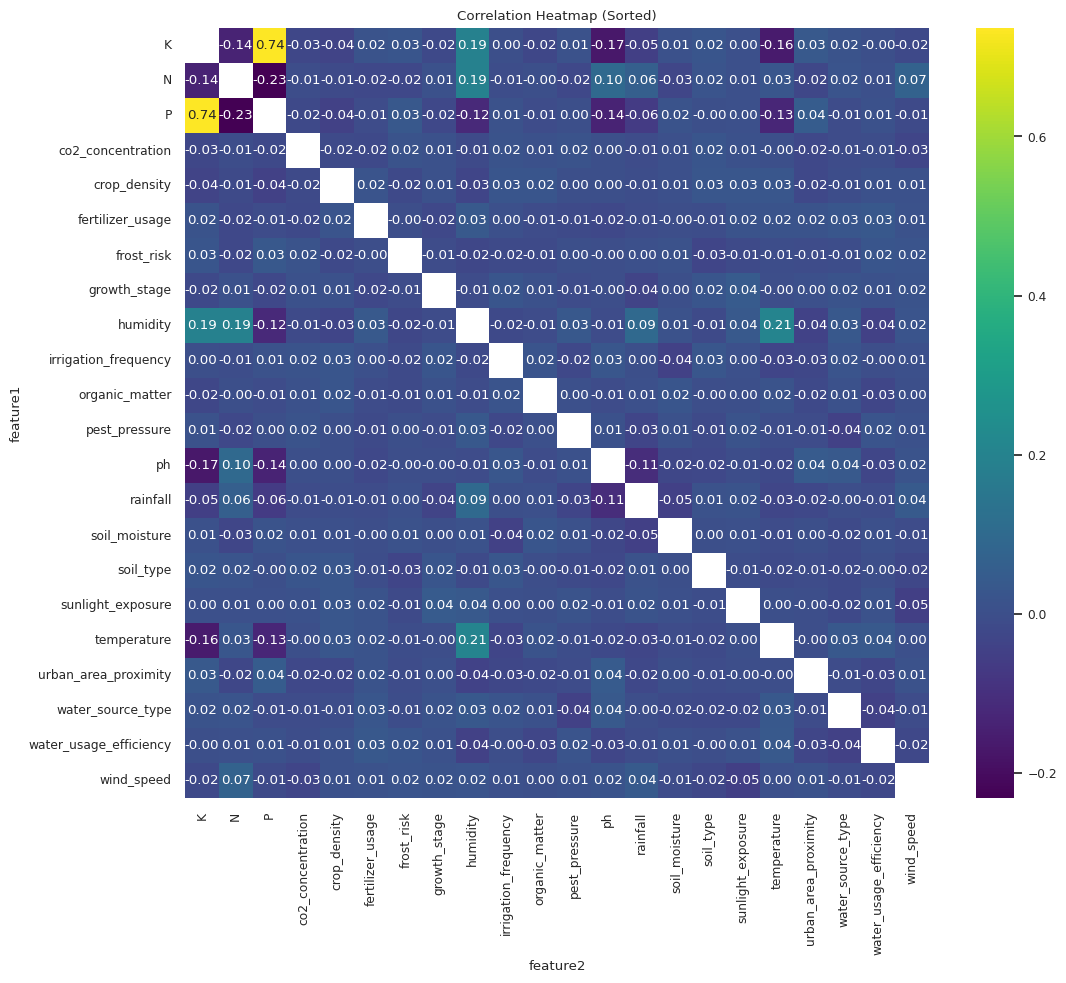

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Calculate the correlation matrix
corr_matrix = df.corr()

# Reshape the correlation matrix to a long format
corr_matrix_long = corr_matrix.stack().reset_index()
corr_matrix_long.columns = ['feature1', 'feature2', 'correlation']

# Filter out self-correlations (correlation = 1)
corr_matrix_long = corr_matrix_long[corr_matrix_long['feature1'] != corr_matrix_long['feature2']]

# Sort by correlation values
corr_matrix_long = corr_matrix_long.sort_values(by=['correlation'])

# Pivot the long format back to a matrix for heatmap
corr_matrix_sorted = corr_matrix_long.pivot(index='feature1', columns='feature2', values='correlation')

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_sorted, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap (Sorted)')
plt.show()

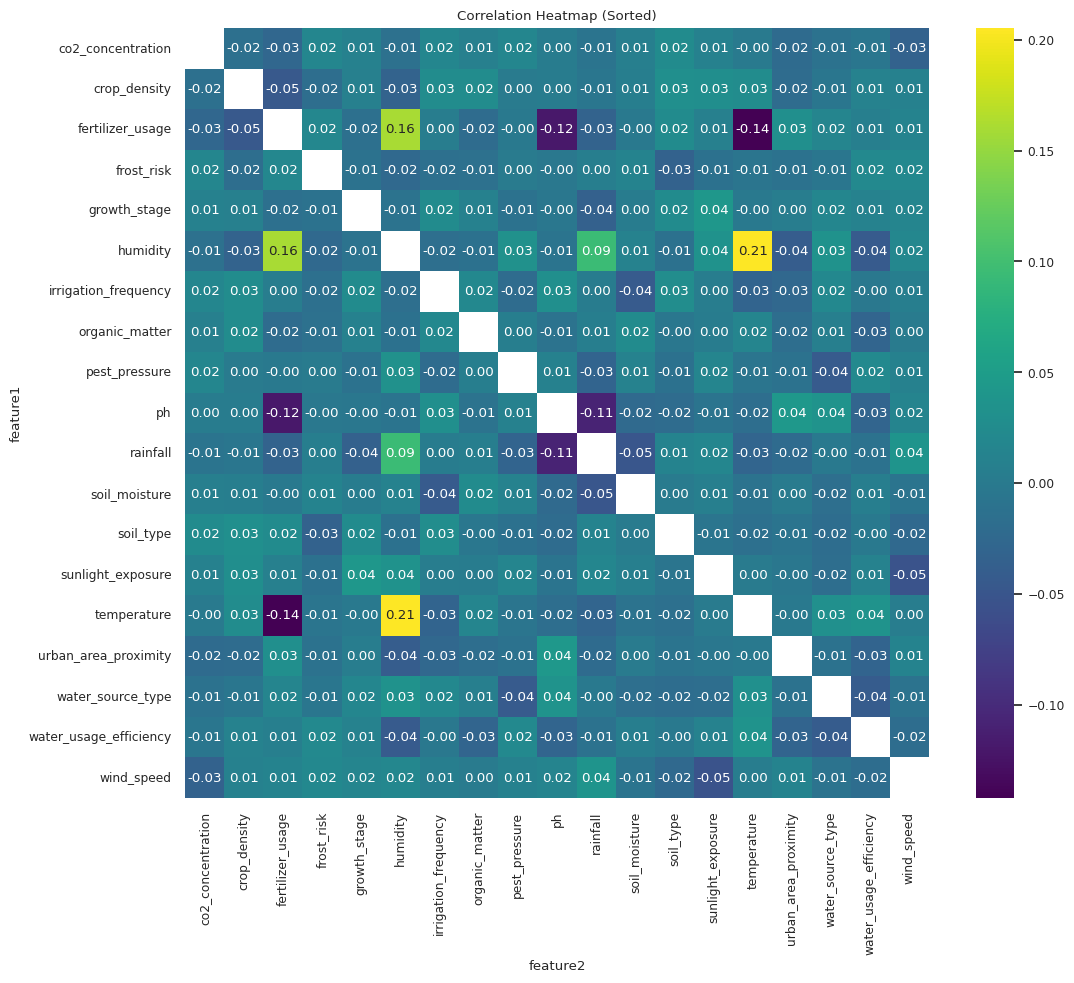

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Calculate the correlation matrix
corr_matrix = df.corr()

# Reshape the correlation matrix to a long format
corr_matrix_long = corr_matrix.stack().reset_index()
corr_matrix_long.columns = ['feature1', 'feature2', 'correlation']

# Filter out self-correlations (correlation = 1)
corr_matrix_long = corr_matrix_long[corr_matrix_long['feature1'] != corr_matrix_long['feature2']]

# Sort by correlation values
corr_matrix_long = corr_matrix_long.sort_values(by=['correlation'])

# Pivot the long format back to a matrix for heatmap
corr_matrix_sorted = corr_matrix_long.pivot(index='feature1', columns='feature2', values='correlation')

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_sorted, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap (Sorted)')
plt.show()

In [ ]:
df

,temperature,humidity,ph,rainfall,soil_moisture,soil_type,sunlight_exposure,wind_speed,co2_concentration,organic_matter,irrigation_frequency,crop_density,pest_pressure,fertilizer_usage,growth_stage,urban_area_proximity,water_source_type,frost_risk,water_usage_efficiency
0,20.879744,82.002744,6.502985,202.935536,29.446064,2,8.677355,10.109875,435.611226,3.121395,4,11.743910,57.607308,175,1,2.719614,3,95.649985,1.193293
1,21.770462,80.319644,7.038096,226.655537,12.851183,3,5.754288,12.048050,401.451860,2.142021,4,16.797101,74.736879,184,1,4.714427,2,77.265694,1.752672
2,23.004459,82.320763,7.840207,263.964248,29.363913,2,9.875230,9.051349,357.417963,1.474974,1,12.654395,1.034478,159,1,30.431736,2,18.192168,3.035541
3,26.491096,80.158363,6.980401,242.864034,26.207732,3,8.023685,7.963606,363.694306,8.393907,1,10.864360,24.091888,149,3,10.861071,3,82.818720,1.273341
4,20.130175,81.604873,7.628473,262.717340,28.236236,2,8.120512,19.264133,410.356458,5.202285,3,13.852910,38.811481,162,2,47.190777,3,25.466499,2.578671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,26.774637,66.413269,6.780064,177.774507,10.697757,1,10.330875,19.192361,439.079069,4.720355,5,18.597260,87.431199,173,3,31.415618,1,77.719639,4.111619
2196,27.417112,56.636362,6.086922,127.924610,12.203830,3,6.070558,10.603401,405.259540,4.141148,6,15.417979,36.958354,141,2,18.797510,3,22.336839,4.190796
2197,24.131797,67.225123,6.362608,173.322839,28.989176,3,11.097182,13.842016,360.482605,1.599614,5,12.956675,79.678658,181,2,38.805888,3,41.782729,2.447010
2198,26.272418,52.127394,6.758793,127.175293,13.642305,2,8.097337,16.537831,415.514314,8.934077,6,16.868131,31.007156,183,2,8.395498,3,49.619791,4.119388


In [ ]:
df['fertilizer_usage'] = df['N'] + df['P'] + df['K']
df.drop(columns=['N', 'P', 'K'], inplace=True)

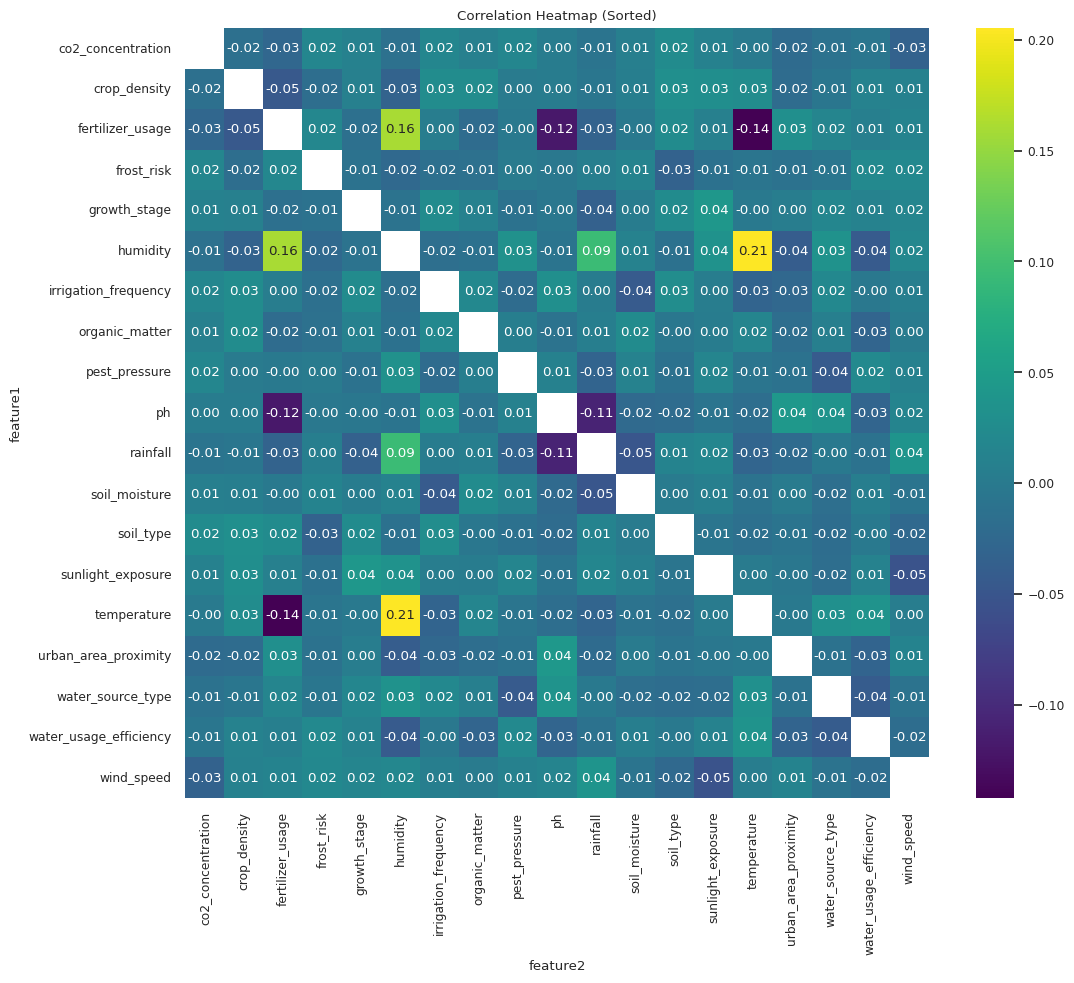

Berdasarkan hasil analisis korelasi di atas, diperoleh 6 atribut yang memiliki korelasi yang tinggi dengan atribut target (irrigation_frequency) yaitu soil_moisture, temperature, urban_area_proximity, ph, soil_type, dan crop_density. Maka dari itu, untuk proses pembuatan model, author akan menggunakan 6 atribut prediktor tersebut.

In [ ]:
df.head()
df.info
df.describe()

,N,P,K,temperature,humidity,ph,rainfall,soil_moisture,soil_type,sunlight_exposure,...,organic_matter,irrigation_frequency,crop_density,pest_pressure,fertilizer_usage,growth_stage,urban_area_proximity,water_source_type,frost_risk,water_usage_efficiency
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,...,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,20.151388,1.991364,8.570609,...,5.465652,3.515000,12.344959,49.850701,125.846403,1.999545,24.801013,2.003636,50.304701,2.990268
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,5.793720,0.812263,1.999382,...,2.605294,1.697912,4.297494,28.886354,43.564527,0.818999,14.523975,0.812021,28.580352,1.139637
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,10.024260,1.000000,5.000710,...,1.003338,1.000000,5.004341,0.038103,50.209990,1.000000,0.017756,1.000000,0.054911,1.002106
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,15.179949,1.000000,6.904620,...,3.203903,2.000000,8.585734,24.379866,88.030737,1.000000,12.212594,1.000000,26.104674,2.051814
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,20.088481,2.000000,8.609968,...,5.418049,4.000000,12.303616,49.982421,126.441536,2.000000,24.922548,2.000000,50.171934,2.968675
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,25.255146,3.000000,10.220394,...,7.686417,5.000000,15.975567,74.681904,163.850536,3.000000,37.322761,3.000000,75.262676,3.968736
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,29.997860,3.000000,11.991041,...,9.999990,6.000000,19.988474,99.983849,199.982166,3.000000,49.992046,3.000000,99.957274,4.997130


## Training and Evaluation

MODEL SIMPLE LINEAR REGRESSION DENGAN ATRIBUT PREDIKTOR "soil_moisture"

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

#====================================================================#
#Pilih fitur utk regresi
x = df[['soil_moisture']]
y = df[['irrigation_frequency']]

#KODE INI DIPAKAI JIKA INGIN MELAKUKAN EVALUASI DENGAN TEKNIK TRAIN TEST SPLIT BIASA
#=====================================================================================
#train with train test split
#Split dataset utk training dan test
#20% test set, 80% training set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
lm_1 = LinearRegression()
lm_1.fit(x_train, y_train) #training the algorithm

#To retrieve the intercept:
print(lm_1.intercept_)
#For retrieving the slope:
print(lm_1.coef_)

y_pred = lm_1.predict(x_test)

#Buat dataframe utk membandingkan
df_comp = pd.DataFrame({'Actual': y_test['irrigation_frequency'], 'Predicted': y_pred.flatten()}) #fixed the dataframe creation

#Hitung dan tampilkan MAE, MSE dan RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test['irrigation_frequency'], y_pred.flatten())) #perbaikan di sini
print('Mean Squared Error:', metrics.mean_squared_error(y_test['irrigation_frequency'], y_pred.flatten())) #perbaikan di sini
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test['irrigation_frequency'], y_pred.flatten()))) #perbaikan di sini

#Hitung dan tampilkan R2
r_2 = r2_score(y_test['irrigation_frequency'], y_pred.flatten()) #perbaikan di sini
print('R^2: ', r_2)

KeyError: "None of [Index(['soil_moisture'], dtype='object')] are in the [columns]"

In [ ]:
#Evaluasi dengan K-FOLDS CROSS VALIDATION
#Pilihan scoring, lihat di:
# https://scikit-learn.org/stable/modules/model_evaluation.html
#contoh: neg_mean_absolute_error, neg_mean_squared_error, neg_root_mean_squared_error, r2

lm_1 = LinearRegression()
folds = KFold(n_splits = 10, shuffle = True, random_state = 47)
scores = cross_val_score(lm_1, x, y, scoring='r2', cv=folds)
print(scores)
print("Avg R2: " + str(np.mean(scores)))
scores = cross_val_score(lm_1, x, y, scoring='neg_mean_absolute_error', cv=folds)
print(scores)
print("Avg MAE: " + str(np.mean(scores)))
scores = cross_val_score(lm_1, x, y, scoring='neg_mean_squared_error', cv=folds)
print(scores)
print("Avg MSE: " + str(np.mean(scores)))

[ 0.0034712  -0.01333645 -0.01865462 -0.00206355 -0.00160253 -0.00928225
  0.00161857 -0.01252069  0.00097037 -0.01267765]
Avg R2: -0.006407761517740707
[-1.39623924 -1.46810413 -1.49534368 -1.47610873 -1.58197556 -1.44103814
 -1.498792   -1.48453072 -1.47380618 -1.51953728]
Avg MAE: -1.4835475666370237
[-2.54987836 -2.88432402 -2.8678916  -2.9086965  -3.16247722 -2.74082691
 -2.9232567  -2.94825525 -2.88314999 -2.94954919]
Avg MSE: -2.8818305726366242


MODEL MULTIPLE LINEAR REGRESSION DENGAN ATRIBUT PREDIKTOR "soil_moisture" & "temperature"

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

#====================================================================#
#Pilih fitur utk regresi
x = df[['soil_moisture','temperature']]
y = df[['irrigation_frequency']]

#KODE INI DIPAKAI JIKA INGIN MELAKUKAN EVALUASI DENGAN TEKNIK TRAIN TEST SPLIT BIASA
#=====================================================================================
#train with train test split
#Split dataset utk training dan test
#20% test set, 80% training set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
lm_2 = LinearRegression()
lm_2.fit(x_train, y_train) #training the algorithm

#To retrieve the intercept:
print(lm_2.intercept_)
#For retrieving the slope:
print(lm_2.coef_)

y_pred = lm_2.predict(x_test)

#Buat dataframe utk membandingkan
df_comp = pd.DataFrame({'Actual': y_test['irrigation_frequency'], 'Predicted': y_pred.flatten()}) #fixed the dataframe creation

#Hitung dan tampilkan MAE, MSE dan RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test['irrigation_frequency'], y_pred.flatten())) #perbaikan di sini
print('Mean Squared Error:', metrics.mean_squared_error(y_test['irrigation_frequency'], y_pred.flatten())) #perbaikan di sini
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test['irrigation_frequency'], y_pred.flatten()))) #perbaikan di sini

#Hitung dan tampilkan R2
r_2 = r2_score(y_test['irrigation_frequency'], y_pred.flatten()) #perbaikan di sini
print('R^2: ', r_2)



[3.92377737]
[[-0.00936112 -0.00842955]]
Mean Absolute Error: 1.530805996582189
Mean Squared Error: 3.024499299527487
Root Mean Squared Error: 1.7391087658704636
R^2:  0.006879142623170353


In [ ]:
#Evaluasi dengan K-FOLDS CROSS VALIDATION
#Pilihan scoring, lihat di:
# https://scikit-learn.org/stable/modules/model_evaluation.html
#contoh: neg_mean_absolute_error, neg_mean_squared_error, neg_root_mean_squared_error, r2

lm_2 = LinearRegression()
folds = KFold(n_splits = 10, shuffle = True, random_state = 47)
scores = cross_val_score(lm_2, x, y, scoring='r2', cv=folds)
print(scores)
print("Avg R2: " + str(np.mean(scores)))
scores = cross_val_score(lm_2, x, y, scoring='neg_mean_absolute_error', cv=folds)
print(scores)
print("Avg MAE: " + str(np.mean(scores)))
scores = cross_val_score(lm_2, x, y, scoring='neg_mean_squared_error', cv=folds)
print(scores)
print("Avg MSE: " + str(np.mean(scores)))



[ 0.00672304 -0.01455413 -0.02094799 -0.0061628  -0.00093182 -0.00557488
  0.0040319  -0.01102618  0.00473192 -0.01257301]
Avg R2: -0.005628394582241747
[-1.3961822  -1.47091875 -1.49610033 -1.4787211  -1.58008573 -1.43941656
 -1.49676428 -1.47982233 -1.47084956 -1.51732145]
Avg MAE: -1.4826182290098866
[-2.54155768 -2.88778998 -2.87434828 -2.92059542 -3.16035949 -2.73075908
 -2.91619049 -2.94390353 -2.87229432 -2.94924442]
Avg MSE: -2.8797042688242236


MODEL MULTIPLE LINEAR REGRESSION DENGAN ATRIBUT PREDIKTOR "soil_moisture", "temperature", dan "urban_area_proximity"

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

#====================================================================#
#Pilih fitur utk regresi
x = df[['temperature','humidity','fertilizer_usage']]
y = df[['irrigation_frequency']]

#KODE INI DIPAKAI JIKA INGIN MELAKUKAN EVALUASI DENGAN TEKNIK TRAIN TEST SPLIT BIASA
#=====================================================================================
#train with train test split
#Split dataset utk training dan test
#20% test set, 80% training set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
lm_3 = LinearRegression()
lm_3.fit(x_train, y_train) #training the algorithm

#To retrieve the intercept:
print(lm_3.intercept_)
#For retrieving the slope:
print(lm_3.coef_)

y_pred = lm_3.predict(x_test)

#Buat dataframe utk membandingkan
df_comp = pd.DataFrame({'Actual': y_test['irrigation_frequency'], 'Predicted': y_pred.flatten()}) #fixed the dataframe creation

#Hitung dan tampilkan MAE, MSE dan RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test['irrigation_frequency'], y_pred.flatten())) #perbaikan di sini
print('Mean Squared Error:', metrics.mean_squared_error(y_test['irrigation_frequency'], y_pred.flatten())) #perbaikan di sini
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test['irrigation_frequency'], y_pred.flatten()))) #perbaikan di sini

#Hitung dan tampilkan R2
r_2 = r2_score(y_test['irrigation_frequency'], y_pred.flatten()) #perbaikan di sini
print('R^2: ', r_2)



[3.75835983]
[[-7.52760627e-03 -7.82594238e-04  7.59737857e-05]]
Mean Absolute Error: 1.5368159460446582
Mean Squared Error: 3.038361292516021
Root Mean Squared Error: 1.7430895824701669
R^2:  0.00232743571291405


In [ ]:
#Evaluasi dengan K-FOLDS CROSS VALIDATION
#Pilihan scoring, lihat di:
# https://scikit-learn.org/stable/modules/model_evaluation.html
#contoh: neg_mean_absolute_error, neg_mean_squared_error, neg_root_mean_squared_error, r2

lm_3 = LinearRegression()
folds = KFold(n_splits = 10, shuffle = True, random_state = 47)
scores = cross_val_score(lm_3, x, y, scoring='r2', cv=folds)
print(scores)
print("Avg R2: " + str(np.mean(scores)))
scores = cross_val_score(lm_3, x, y, scoring='neg_mean_absolute_error', cv=folds)
print(scores)
print("Avg MAE: " + str(np.mean(scores)))
scores = cross_val_score(lm_3, x, y, scoring='neg_mean_squared_error', cv=folds)
print(scores)
print("Avg MSE: " + str(np.mean(scores)))



[ 0.00672304 -0.01455413 -0.02094799 -0.0061628  -0.00093182 -0.00557488
  0.0040319  -0.01102618  0.00473192 -0.01257301]
Avg R2: -0.005628394582241747
[-1.3961822  -1.47091875 -1.49610033 -1.4787211  -1.58008573 -1.43941656
 -1.49676428 -1.47982233 -1.47084956 -1.51732145]
Avg MAE: -1.4826182290098866
[-2.54155768 -2.88778998 -2.87434828 -2.92059542 -3.16035949 -2.73075908
 -2.91619049 -2.94390353 -2.87229432 -2.94924442]
Avg MSE: -2.8797042688242236
